In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Exploring population data

In [4]:
pop_df = pd.read_excel('millenniumofdata_v3_final.xlsx',sheet_name = "A2. Pop of Eng & GB 1086-1870", skiprows = 7)

C:\Users\BUI\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


In [45]:
# Explore the dataset
print(pop_df.info())
pop_df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785 entries, 0 to 784
Data columns (total 3 columns):
Year                                     785 non-null int64
Population of England, millions          785 non-null float64
Population of Great Britain, millions    171 non-null float64
dtypes: float64(2), int64(1)
memory usage: 18.5 KB
None


,Year,"Population of England, millions","Population of Great Britain, millions"
780,1866,20.166624,24.625
781,1867,20.426416,24.922
782,1868,20.724960,25.224
783,1869,20.978960,25.529
784,1870,21.239824,25.838


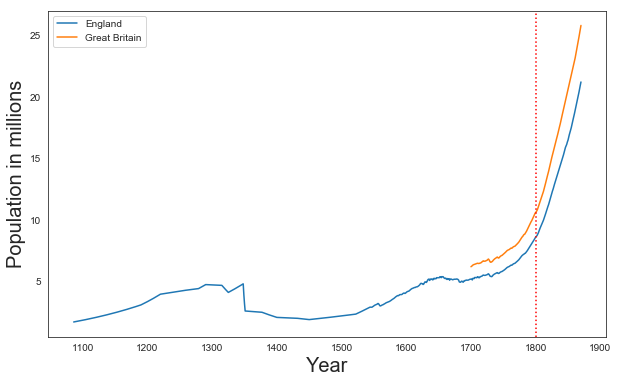

In [55]:
# Explore the population
# In England
sns.set_style("white")
plt.figure(figsize=(10,6))
plt.plot('Year', 'Population of England, millions', label='England', data=pop_df)
plt.plot('Year', 'Population of Great Britain, millions', label='Great Britain', data=pop_df)
plt.axvline(1800, linestyle=':', c='red')
plt.legend()
plt.xlabel('Year', fontsize=18)
plt.ylabel('Population in millions', fontsize=18)
plt.show()

Population increases exponentially during the 19th century

# Exploring argiculture data

In [19]:
arg_df = pop_df = pd.read_excel('millenniumofdata_v3_final.xlsx',sheet_name = "A3. Eng. Agriculture 1270-1870", skiprows = 10)

In [20]:
# Remove empty columns
non_null_columns = [col for col in arg_df.columns if arg_df.loc[:, col].notna().any()]
arg_df = arg_df[non_null_columns]
arg_df.dropna(how='all', inplace=True)

C:\Users\BUI\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [21]:
arg_df.describe()

,Year,Total Arable and Sown Acreage,Livestock Output %,Livestock Output %.1
count,602.000000,602.000000,601.000000,601.000000
mean,1570.500000,10.112430,42.256727,37.825800
std,173.926709,1.577765,17.129713,14.548686
min,1270.000000,8.440456,0.000000,0.000000
25%,1420.250000,8.729190,34.922189,32.285837
50%,1570.500000,9.576112,44.544682,40.022812
75%,1720.750000,11.204573,53.562196,47.245127
max,1871.000000,14.115123,76.467126,71.227160


In [23]:
# Clean up the data
arg_df.drop(arg_df.index[0], inplace=True)
arg_df.drop(arg_df.index[-1], inplace=True)

C:\Users\BUI\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [29]:
arg_df.iloc[pd.np.r_[0:5, -5:0]]

,Year,Total Arable and Sown Acreage,Wheat,Rye,Barley,Oats,Pulses,Potatoes,Wheat.1,Rye.1,...,Wool,Hides,Hay,Arable output,Pastoral output,Total agricultural output,Arable Output %,Livestock Output %,Arable Output %.1,Livestock Output %.1
1,1270.0,12.525191,7.45335,9.20047,11.4389,11.1911,1.82876,NaN,16.4427,7.11039,...,22.4112,6.48233,0.117319,77.0458,55.4406,64.5968,57.4808,42.519241,67.2519,32.748136
2,1271.0,12.529016,6.72806,11.5046,13.0163,10.5141,1.57859,NaN,14.9032,8.86402,...,21.7038,6.39544,0.114153,76.2274,54.8762,63.9228,61.6016,38.398450,67.3948,32.605210
3,1272.0,12.532846,9.77959,11.5339,12.2111,9.00905,0.678903,NaN,21.7506,8.85946,...,21.2444,6.2979,0.114363,87.4306,54.3425,69.0289,65.4144,34.585557,70.2397,29.760274
4,1273.0,12.536683,6.89582,6.193,11.4996,10.0958,1.06881,NaN,15.399,4.74238,...,21.569,6.29285,0.113075,71.264,54.5958,61.4028,55.5395,44.460480,65.2583,34.741696
5,1274.0,12.540526,6.32574,9.84543,10.4837,10.0422,3.88876,NaN,14.1831,7.51602,...,21.8833,6.2352,0.114156,69.6337,54.3281,60.4876,58.1622,41.837828,65.6677,34.332309
597,1866.0,13.386000,26.2137,24.842,31.5238,40.2418,22.9507,150,81.9439,1.22398,...,84.2759,55.1109,1.94454,274.196,461.699,354.659,39.1943,60.805700,45.3718,54.628161
598,1867.0,13.334000,28.2916,16.9232,26.4069,32.5682,24.5705,150,88.8355,0.706414,...,85.354,56.2269,1.94608,275.116,470.701,359.016,44.5614,55.438576,45.0244,54.975639
599,1868.0,13.274000,33.9395,14.3519,26.5577,25.348,13.4367,150,115.292,0.53665,...,86.4376,57.343,1.94763,315.961,479.751,386.469,49.2204,50.779558,47.8876,52.112367
600,1869.0,13.731000,31.4765,18.9865,32.9691,41.6675,18.757,150,107.555,1.00071,...,87.527,58.459,1.94917,329.433,488.848,398.122,43.332,56.668043,48.5839,51.416055
601,1870.0,13.837000,31.6901,16.6471,23.2592,41.523,15.2637,150,102.93,0.882298,...,86.8944,59.1536,1.95072,300.109,494.707,383.662,38.8483,61.151679,45.9929,54.007110


Text(0,0.5,'Millions of  acres')

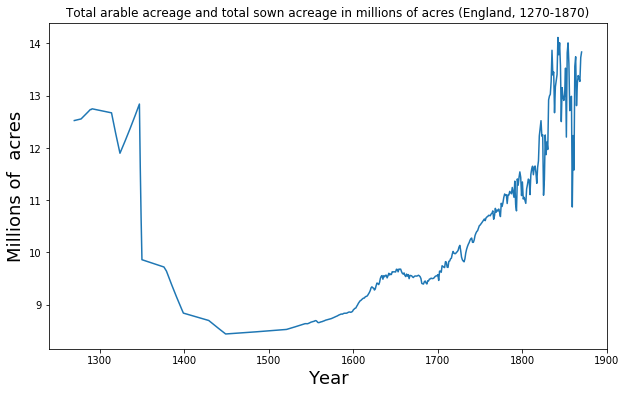

In [34]:
plt.figure(figsize=(10,6))
plt.plot('Year', 'Total Arable and Sown Acreage', data=arg_df)
plt.title("Total arable acreage and total sown acreage in millions of acres (England, 1270-1870)")
plt.xlabel('Year', fontsize=18)
plt.ylabel('Millions of  acres', fontsize=18)

There was a sharp drop in the size of arable and sown acreage in England during the mid point of the 14th century. This might be due to the famine and food crisises occured then.
The trend continues for a century then the figure starts picking up. It increased quickly starting from the 17th century.
The upward trend continues till the 19th century. There was a drop during mid 1800s but it picked up quickly from there.